
Zadanie 1. Uczenie wzorców funkcji XOR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/xor.csv')
print(df)

   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0


In [ ]:
x = df[['x1','x2']].to_numpy()
y = df['y'].to_numpy()
print(x)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 1 1 0]


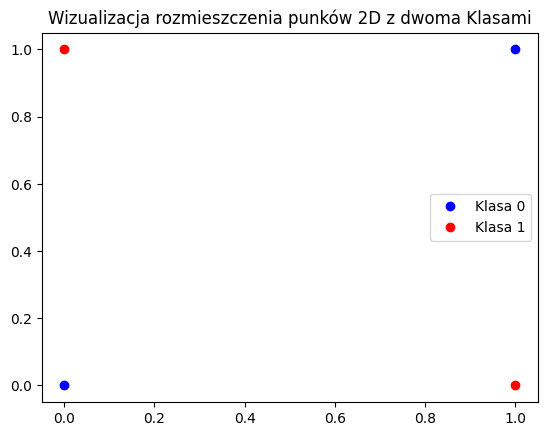

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x[y == 0][:, 0], x[y == 0][:, 1], 'bo', label='Klasa 0')
plt.plot(x[y == 1][:, 0], x[y == 1][:, 1], 'ro', label='Klasa 1')
plt.legend()
plt.title('Wizualizacja rozmieszczenia punków 2D z dwoma Klasami')
plt.show()

Przygotowanie modelu sztucznej sieci neuronowej

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2, name="first"))
model.add(Dense(1, activation='sigmoid', name="second"))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse' ,
metrics=['accuracy'] )

Predykcja

1/1 [==============================] - 0s 244ms/step
[0 0] 0 0.0
[0 1] 1 0.0
[1 0] 1 0.0
[1 1] 0 0.0


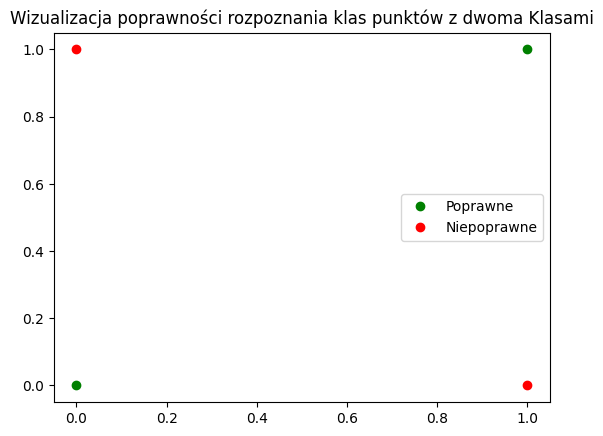

In [ ]:
import numpy as np

pred = np.round(model.predict(x).flatten())
for i in range(len(x)):
  print(x[i], y[i], pred[i])

plt.plot(x[y == pred][:, 0], x[y == pred][:, 1], 'go',
label='Poprawne')
plt.plot(x[y != pred][:, 0], x[y != pred][:, 1], 'ro',
label='Niepoprawne')

plt.legend()
plt.title('Wizualizacja poprawności rozpoznania klas punktów z dwoma Klasami')
plt.show()

Uczenie sieci

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.7500
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.7500
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.7500
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.7500
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.7500
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.7500
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.7500
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2330 - accuracy: 0.7500
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2328 - accuracy: 0.7500
Epoch 10/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2328 - accuracy: 0.7500
Epoch 11/1000
4/4 [

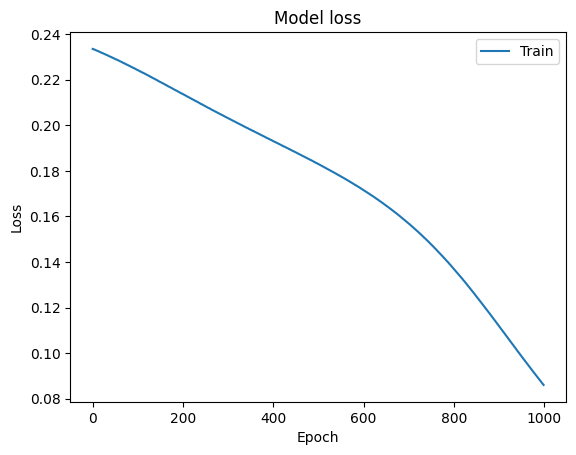

In [ ]:
history = model.fit(x, y, epochs=1000, batch_size=1, verbose=1)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Sprawdzenie poprawności treningu sieci

1/1 [==============================] - 0s 22ms/step
[0 0] 0 0.0
[0 1] 1 1.0
[1 0] 1 1.0
[1 1] 0 0.0


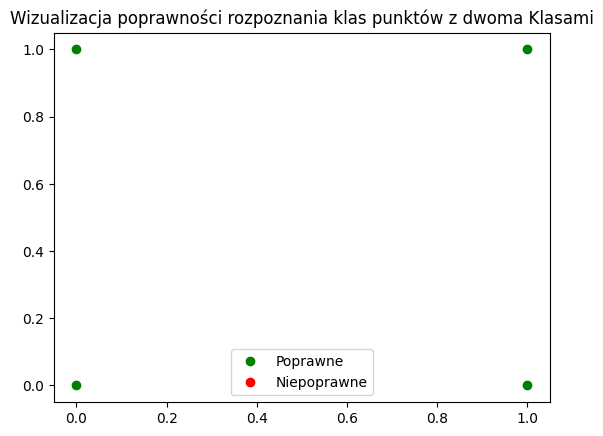

In [ ]:
pred = np.round(model.predict(x).flatten())
for i in range(len(x)):
  print(x[i], y[i], pred[i])

plt.plot(x[y == pred][:, 0], x[y == pred][:, 1], 'go',
label='Poprawne')
plt.plot(x[y != pred][:, 0], x[y != pred][:, 1], 'ro',
label='Niepoprawne')

plt.legend()
plt.title('Wizualizacja poprawności rozpoznania klas punktów z dwoma Klasami')
plt.show()

Zadanie 2

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/xor2.csv')
print(df2)

   x1  x2  x3  y
0   0   0   0  0
1   0   0   1  1
2   0   1   0  1
3   0   1   1  0
4   1   0   0  1
5   1   0   1  0
6   1   1   0  0
7   1   1   1  1


In [ ]:
x2 = df2[['x1','x2','x3']].to_numpy()
y2 = df2['y'].to_numpy()
print(x2)
print(y2)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0 1 1 0 1 0 0 1]


In [ ]:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim=3, name="first"))
#model.add(Dense(3, activation='sigmoid', input_dim=3, name="second"))
model.add(Dense(1, activation='sigmoid', name="third"))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse', metrics=['accuracy'] )

In [ ]:
pred2 = np.round(model.predict(x2).flatten())
for i in range(len(x2)):
  print(x2[i], y2[i], pred2[i])

1/1 [==============================] - 0s 144ms/step
[0 0 0] 0 1.0
[0 0 1] 1 1.0
[0 1 0] 1 1.0
[0 1 1] 0 1.0
[1 0 0] 1 1.0
[1 0 1] 0 1.0
[1 1 0] 0 1.0
[1 1 1] 1 1.0


In [ ]:
history = model.fit(x2, y2, epochs=1000, batch_size=1, verbose=1)

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.7500
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.7500
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.7500
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.7500
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.7500
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.7500
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.7500
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.7500
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.7500
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.7500
Epoch 11/1000
8/8 [

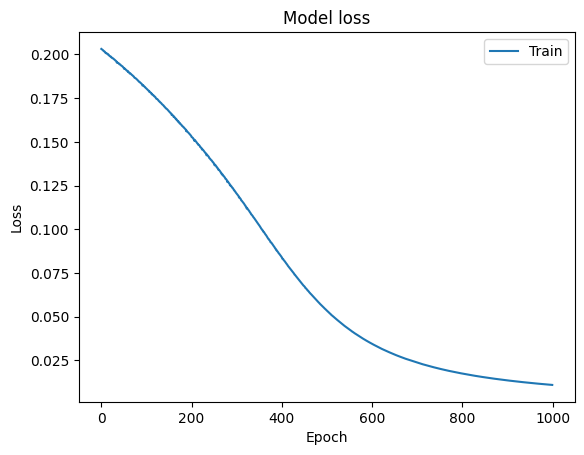

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


In [ ]:
pred2 = np.round(model.predict(x2).flatten())
for i in range(len(x2)):
  print(x2[i], y2[i], pred2[i])

1/1 [==============================] - 0s 20ms/step
[0 0 0] 0 0.0
[0 0 1] 1 1.0
[0 1 0] 1 1.0
[0 1 1] 0 0.0
[1 0 0] 1 1.0
[1 0 1] 0 0.0
[1 1 0] 0 0.0
[1 1 1] 1 1.0


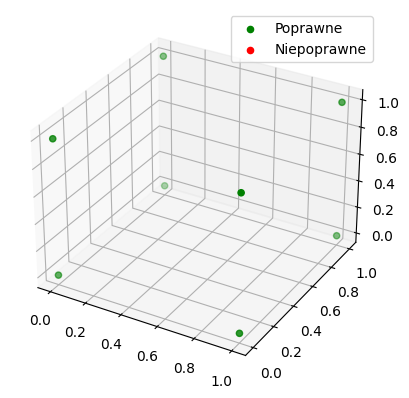

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x2[y2 == pred2][:,0], x2[y2 == pred2][:,1], x2[y2 == pred2][:,2], c='g', marker='o', label='Poprawne')
ax.scatter(x2[y2 != pred2][:,0], x2[y2 != pred2][:,1], x2[y2 != pred2][:,2], c='r', marker='o', label='Niepoprawne')

ax.legend()
plt.show()